# Reproduce results

Henceforth, we load the necessary packages (installed in the environment which can be set up through the `requirements.txt`) and the serialized `sklearn.pipeline.Pipeline`, and then we retrieve back the same statistics as the `train_models.ipynb` notebook.

## 0. Set-up

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

# our custom functions
from utils import remove_nan_questions

[nltk_data] Downloading package punkt to /home/gcastro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
_path_folder_quora = "~/Datasets/QuoraQuestionPairs"
MODELS_DIR = "model_artifacts"
SEED = 123

## 1. We load & split the data

In [3]:
train_df = pd.read_csv(os.path.join(_path_folder_quora, "quora_train_data.csv"))
x_train = train_df.loc[:, ["question1", "question2"]]
y_train = train_df.loc[:, "is_duplicate"]

x_train, y_train = remove_nan_questions(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(
        x_train, y_train, test_size=0.05, random_state=SEED)
x_train, x_validation, y_train, y_validation = train_test_split(
        x_train, y_train, test_size=0.05, random_state=SEED)

## 2. We load the serialized model

In [11]:
simple_pipe = joblib.load(f'{MODELS_DIR}/simple_solution.pk1')
improved_pipe = joblib.load(f'{MODELS_DIR}/improved_solution.joblib')

## 3. Evaluate the performance

### 3.1 Simple solution

We print the required metrics: precision, recall, f1-score and AUC

In [12]:
y_pred_train = simple_pipe.predict(x_train)
y_probs_train = simple_pipe.predict_proba(x_train)[:, 1]

y_pred_validation = simple_pipe.predict(x_validation)
y_probs_validation = simple_pipe.predict_proba(x_validation)[:, 1]

y_pred_test = simple_pipe.predict(x_test)
y_probs_test = simple_pipe.predict_proba(x_test)[:, 1]

In [13]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
auc_roc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
auc_roc_test = auc(fpr_test, tpr_test)
fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_probs_validation)
auc_roc_validation = auc(fpr_validation, tpr_validation)

print("TRAINING results:\n", classification_report(y_train, y_pred_train))
print("VALIDATION results:\n", classification_report(y_validation, y_pred_validation))
print("TESTING results:\n", classification_report(y_test, y_pred_test))

print("Training AUC:", auc_roc_train)
print("Valitaion AUC:", auc_roc_validation)
print("Testing AUC:", auc_roc_test)

TRAINING results:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86    184250
           1       0.78      0.69      0.73    107644

    accuracy                           0.81    291894
   macro avg       0.81      0.79      0.79    291894
weighted avg       0.81      0.81      0.81    291894

VALIDATION results:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81      9728
           1       0.67      0.61      0.64      5635

    accuracy                           0.75     15363
   macro avg       0.73      0.72      0.72     15363
weighted avg       0.74      0.75      0.75     15363

TESTING results:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81     10178
           1       0.69      0.61      0.65      5994

    accuracy                           0.75     16172
   macro avg       0.74      0.72      0.73     16172
weighted avg    

Finally, we plot the ROC curve

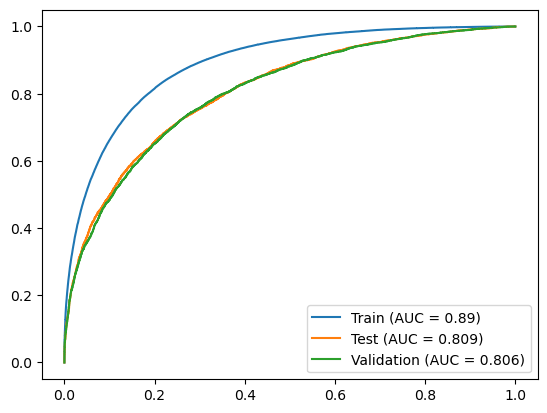

In [14]:
plt.plot(fpr_train, tpr_train,
         label=f'Train (AUC = {round(auc_roc_train, 3)})')
plt.plot(fpr_test, tpr_test,
         label=f'Test (AUC = {round(auc_roc_test, 3)})')
plt.plot(fpr_validation, tpr_validation,
         label=f'Validation (AUC = {round(auc_roc_validation, 3)})')
plt.legend()
plt.savefig(f'{MODELS_DIR}/basic_sol_roc.png', dpi=250)
plt.show()
plt.close()

### 3.1 Improved solution

We print the required metrics: precision, recall, f1-score and AUC

In [8]:
y_pred_train = improved_pipe.predict(x_train)
y_probs_train = improved_pipe.predict_proba(x_train)[:, 1]

y_pred_validation = improved_pipe.predict(x_validation)
y_probs_validation = improved_pipe.predict_proba(x_validation)[:, 1]

y_pred_test = improved_pipe.predict(x_test)
y_probs_test = improved_pipe.predict_proba(x_test)[:, 1]

In [9]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
auc_roc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
auc_roc_test = auc(fpr_test, tpr_test)
fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_probs_validation)
auc_roc_validation = auc(fpr_validation, tpr_validation)

print("TRAINING results:\n", classification_report(y_train, y_pred_train))
print("VALIDATION results:\n", classification_report(y_validation, y_pred_validation))
print("TESTING results:\n", classification_report(y_test, y_pred_test))

print("Training AUC:", auc_roc_train)
print("Valitaion AUC:", auc_roc_validation)
print("Testing AUC:", auc_roc_test)

TRAINING results:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    184250
           1       0.97      0.99      0.98    107644

    accuracy                           0.98    291894
   macro avg       0.98      0.98      0.98    291894
weighted avg       0.98      0.98      0.98    291894

VALIDATION results:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      9728
           1       0.80      0.78      0.79      5635

    accuracy                           0.85     15363
   macro avg       0.84      0.83      0.84     15363
weighted avg       0.85      0.85      0.85     15363

TESTING results:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     10178
           1       0.80      0.78      0.79      5994

    accuracy                           0.84     16172
   macro avg       0.83      0.83      0.83     16172
weighted avg    

Finally, we plot the ROC curve

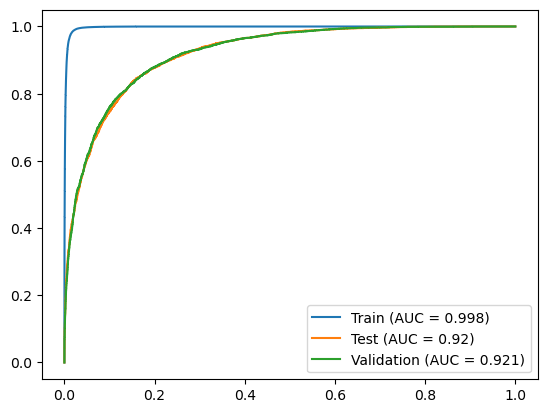

In [10]:
plt.plot(fpr_train, tpr_train,
         label=f'Train (AUC = {round(auc_roc_train, 3)})')
plt.plot(fpr_test, tpr_test,
         label=f'Test (AUC = {round(auc_roc_test, 3)})')
plt.plot(fpr_validation, tpr_validation,
         label=f'Validation (AUC = {round(auc_roc_validation, 3)})')
plt.legend()
plt.savefig(f'{MODELS_DIR}/basic_sol_roc.png', dpi=250)
plt.show()
plt.close()